In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexteboul_diabetes_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/diabetes-health-indicators-dataset')

print('Data source import complete.')


100%|██████████| 6.03M/6.03M [00:00<00:00, 161MB/s]

Extracting files...


Data source import complete.


In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 134MB/s]


In [ ]:
!unzip ./diabetes-health-indicators-dataset.zip -d ./diabetes-health-indicators-dataset

Archive:  ./diabetes-health-indicators-dataset.zip
  inflating: ./diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: ./diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: ./diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

np.random.seed(42)
#from ydata_profiling import ProfileReport

In [ ]:
features = pd.read_csv('/content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# EDA

# PreProcessing


In [ ]:
# gộp
features.loc[features['Education'] < 3, 'Education'] = 3


In [ ]:
features.drop_duplicates(inplace=True)
features.reset_index(drop=True, inplace=True)

In [ ]:
# loại bỏ các dữ liệu trùng lặp
features.drop_duplicates(inplace=True)
features.reset_index(drop=True, inplace=True)
Sscaler = StandardScaler()
Rscaler = RobustScaler()
Mscaler = MinMaxScaler()
features_standardized = pd.DataFrame(Sscaler.fit_transform(features), columns=features.columns)
features_robust = pd.DataFrame(Rscaler.fit_transform(features), columns=features.columns)
features_MinMax = pd.DataFrame(Mscaler.fit_transform(features), columns=features.columns)



features[['BMI', 'Age', 'GenHlth']] = features_standardized[['BMI', 'Age', 'GenHlth']]
features[['MentHlth', 'PhysHlth']] = features_robust[['MentHlth', 'PhysHlth']]
features[['Education', 'Income']] = features_MinMax[['Education', 'Income']]


# chia tập thành train | test

# chia tập thành train | val | test

In [ ]:
class_0 = features[features['Diabetes_binary'] == 0]
class_1 = features[features['Diabetes_binary'] == 1]

x_class_0, y_class_0 = class_0.drop(columns=['Diabetes_binary'], axis=1), class_0['Diabetes_binary']
x_class_1, y_class_1 = class_1.drop(columns=['Diabetes_binary'], axis=1), class_1['Diabetes_binary']

x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_class_0, y_class_0, test_size=0.2, random_state=1)
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_class_1, y_class_1, test_size=0.2, random_state=1)

x_0_train, x_0_val, y_0_train, y_0_val = train_test_split(x_0_train, y_0_train, test_size=0.25, random_state=1)
x_1_train, x_1_val, y_1_train, y_1_val = train_test_split(x_1_train, y_1_train, test_size=0.25, random_state=1)



x_train = pd.concat(objs=[x_0_train, x_1_train], ignore_index=True).to_numpy()
y_train = pd.concat(objs=[y_0_train, y_1_train], ignore_index=True).to_numpy()
index = np.arange(x_train.shape[0])
np.random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

x_val = pd.concat(objs=[x_0_val, x_1_val], ignore_index=True).to_numpy()
y_val = pd.concat(objs=[y_0_val, y_1_val], ignore_index=True).to_numpy()
index = np.arange(x_val.shape[0])
np.random.shuffle(index)
x_val = x_val[index]
y_val = y_val[index]

x_test = pd.concat(objs=[x_0_test, x_1_test], ignore_index=True).to_numpy()
y_test = pd.concat(objs=[y_0_test, y_1_test], ignore_index=True).to_numpy()
index = np.arange(x_test.shape[0])
np.random.shuffle(index)
x_test = x_test[index]
y_test = y_test[index]

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

rf = RandomForestClassifier(random_state=42, bootstrap=True)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    #[100,125,150,175,200],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(5,15),
    'min_samples_leaf':np.arange(1,3,1),
    'min_samples_split':np.arange(1,10,1),

}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=0, scoring='f1_macro')

# Fit to the training data
grid_search.fit(x_train, y_train)

# Get best parameters
best_rf = grid_search.best_estimator_
#Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

best_rf = RandomForestClassifier(random_state=42, bootstrap=True, criterion='gini', max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=150)
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=150, random_state=42)

In [ ]:
models = {
    "RandomForest": best_rf,
    # "WeightedGaussianNB": best_wgnb,
    # "TransformedGaussianNB": best_tgnb,
    # # "MultinomialNB": best_mnb,
    # "BernoulliNB": best_bnb
}

results = {}

for model_name, model in models.items():
    #model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')

    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "f1_score": f1,
        "classification_report": classification_report(y_val, y_pred, output_dict=True)
    }
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}\n")



Model: RandomForest
Accuracy: 0.7444, F1 Score: 0.7433
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      6792
         1.0       0.73      0.80      0.76      7019

    accuracy                           0.74     13811
   macro avg       0.75      0.74      0.74     13811
weighted avg       0.75      0.74      0.74     13811




In [ ]:
from sklearn.inspection import permutation_importance

best_model_name = max(results, key=lambda m: results[m]["f1_score"])
best_model = results[best_model_name]["model"]
print(f"\nBest Model: {best_model_name}")

result = permutation_importance(best_model, x_val, y_val, n_repeats=50, random_state=42, scoring='f1_macro', n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
feature_importances = result.importances_mean
features_w = features.drop(columns=['Diabetes_binary'], axis=1).columns

importance_df  = pd.DataFrame({
    'Feature': features_w,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Hiển thị kết quả
for i in result.importances_mean.argsort()[::-1]:
    print(f"Đặc trưng {features.columns[i+1]}: {result.importances_mean[i]:.4f} +-  {result.importances_std[i]:.4f}")



Best Model: RandomForest
Đặc trưng GenHlth: 0.0332 +-  0.0025
Đặc trưng BMI: 0.0225 +-  0.0021
Đặc trưng HighBP: 0.0177 +-  0.0022
Đặc trưng Age: 0.0160 +-  0.0018
Đặc trưng HighChol: 0.0061 +-  0.0012
Đặc trưng HeartDiseaseorAttack: 0.0028 +-  0.0010
Đặc trưng DiffWalk: 0.0026 +-  0.0009
Đặc trưng CholCheck: 0.0019 +-  0.0005
Đặc trưng HvyAlcoholConsump: 0.0013 +-  0.0005
Đặc trưng Income: 0.0010 +-  0.0010
Đặc trưng PhysHlth: 0.0009 +-  0.0008
Đặc trưng PhysActivity: 0.0008 +-  0.0006
Đặc trưng Stroke: 0.0006 +-  0.0004
Đặc trưng Fruits: 0.0005 +-  0.0004
Đặc trưng Smoker: 0.0005 +-  0.0005
Đặc trưng Education: 0.0004 +-  0.0007
Đặc trưng MentHlth: 0.0003 +-  0.0006
Đặc trưng AnyHealthcare: 0.0003 +-  0.0002
Đặc trưng NoDocbcCost: 0.0000 +-  0.0003
Đặc trưng Sex: 0.0000 +-  0.0007
Đặc trưng Veggies: -0.0002 +-  0.0005


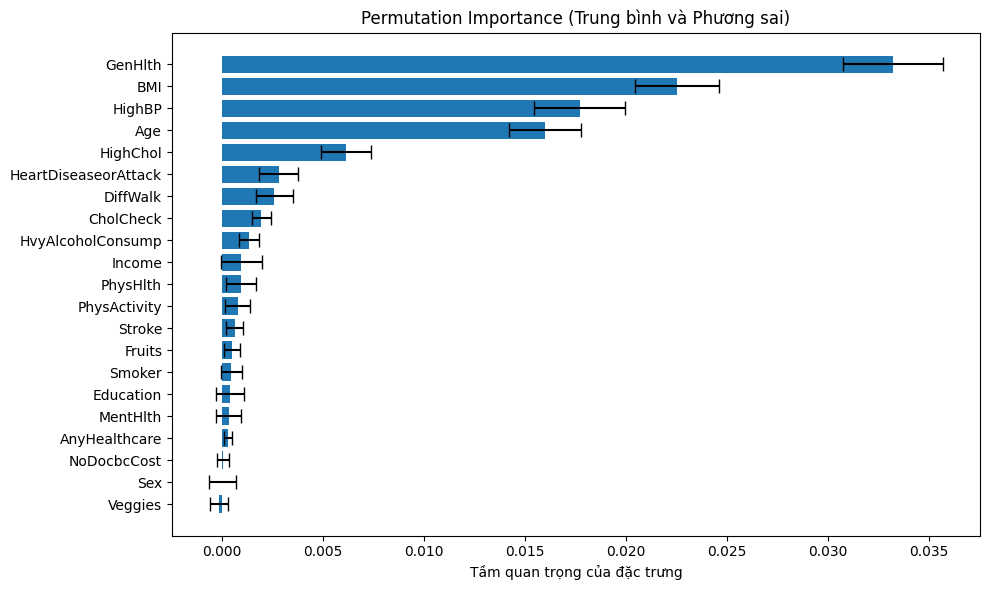

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử `result.importances_mean` là giá trị trung bình và `result.importances_std` là phương sai
means = result.importances_mean[sorted_idx]
stds = result.importances_std[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(
    range(len(sorted_idx)),
    means,
    xerr=stds,  # Thêm phương sai vào đây
    align="center",
    alpha=1,  # Tùy chỉnh độ trong suốt
    capsize=5  # Kích thước các đường gạch ngang của lỗi
)
plt.yticks(range(len(sorted_idx)), [features.columns[i+1] for i in sorted_idx])
plt.xlabel("Tầm quan trọng của đặc trưng")
plt.title("Permutation Importance (Trung bình và Phương sai)")
plt.tight_layout()
plt.savefig('importances2.png')
plt.show()

In [ ]:
low_importance_features = importance_df[importance_df['Importance'] <= 0]
# Get the list of feature names
low_importance_feature_names = low_importance_features.sort_values(by='Importance', ascending=True).head(3)['Feature'].tolist()
print(low_importance_feature_names)


['Veggies']


In [ ]:
x_train = pd.DataFrame(x_train, columns = features.drop(columns=['Diabetes_binary'], axis=1).columns)
y_train = pd.DataFrame(y_train, columns = ["Diabetes_binary"])
x_val = pd.DataFrame(x_val, columns = features.drop(columns=['Diabetes_binary'], axis=1).columns)
y_val = pd.DataFrame(y_val, columns = ["Diabetes_binary"])
x_test = pd.DataFrame(x_test, columns = features.drop(columns=['Diabetes_binary'], axis=1).columns)
y_test = pd.DataFrame(y_test, columns = ["Diabetes_binary"])

In [ ]:
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)
x_test = x_test

models = {
    #"GaussianNB": best_gnb,
    "RandomForest": best_rf
    # "WeightedGaussianNB": best_wgnb,
    # "TransformedGaussianNB": best_tgnb,
    # # "MultinomialNB": best_mnb,
    # "BernoulliNB": best_bnb
}

results = {}

for model_name, model in models.items():
    model.fit(x_combined.to_numpy(), y_combined.to_numpy())
    y_pred = model.predict(x_test.to_numpy())

    accuracy = accuracy_score(y_test.to_numpy(), y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "f1_score": f1,
        "classification_report": classification_report(y_test.to_numpy(), y_pred, output_dict=True)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_test.to_numpy(), y_pred)}\n")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForest
Accuracy: 0.7530, F1 Score: 0.7523
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6792
         1.0       0.74      0.79      0.77      7019

    accuracy                           0.75     13811
   macro avg       0.75      0.75      0.75     13811
weighted avg       0.75      0.75      0.75     13811




In [ ]:
x_combined = pd.concat([x_train, x_val], axis=0).drop(columns=low_importance_feature_names)
y_combined = pd.concat([y_train, y_val], axis=0)
x_test = x_test.drop(columns=low_importance_feature_names)

models = {
    #"GaussianNB": best_gnb,
    "RandomForest": best_rf
    # "WeightedGaussianNB": best_wgnb,
    # "TransformedGaussianNB": best_tgnb,
    # # "MultinomialNB": best_mnb,
    # "BernoulliNB": best_bnb
}

results = {}

for model_name, model in models.items():
    model.fit(x_combined.to_numpy(), y_combined.to_numpy())
    y_pred = model.predict(x_test.to_numpy())

    accuracy = accuracy_score(y_test.to_numpy(), y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "f1_score": f1,
        "classification_report": classification_report(y_test.to_numpy(), y_pred, output_dict=True)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_test.to_numpy(), y_pred)}\n")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForest
Accuracy: 0.7533, F1 Score: 0.7526
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6792
         1.0       0.74      0.80      0.77      7019

    accuracy                           0.75     13811
   macro avg       0.75      0.75      0.75     13811
weighted avg       0.75      0.75      0.75     13811


